# Linear regression with Python

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.head()
# The data was artificially created

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Light exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

# The address column is not appearing because it contains only string values

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

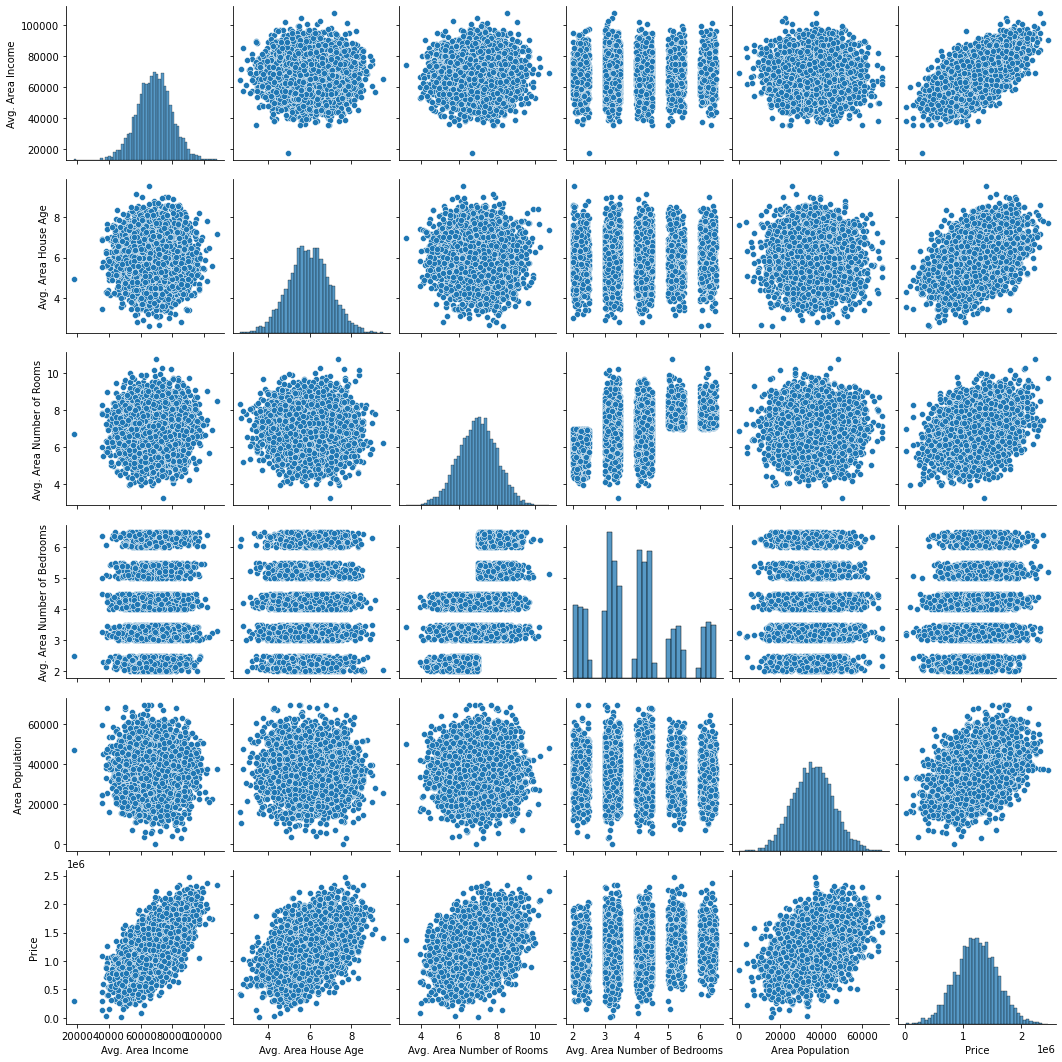

In [10]:
sns.pairplot(data=df,)

Virtually all histograms are normally distributed except for the average number of bedrooms.

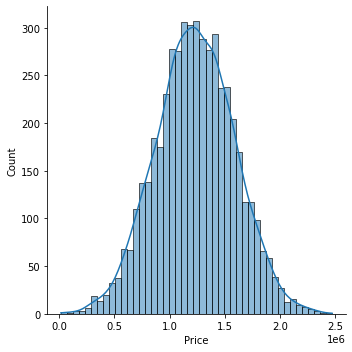

In [14]:
sns.displot(data=df['Price'], kde=True)

<AxesSubplot:>

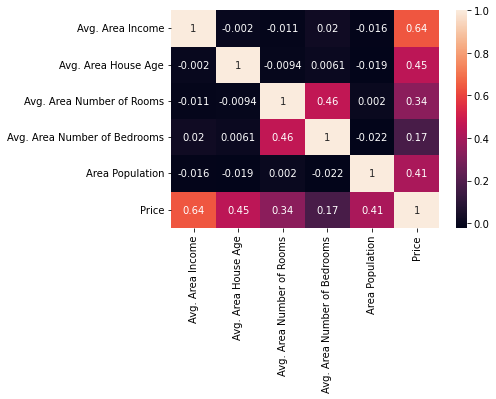

In [16]:
sns.heatmap(data=df.corr(), annot=True)

### Splitting the test and train data

In [17]:
# Features 
X = df[['Avg. Area Income', 'Avg. Area House Age', 
'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
'Area Population']]

# Target variable/ prediction
y = df['Price']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
"""
 test_size is the percentage of your dataset allocated to test size. Random state is only used
 for consistency in the results.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Fitting and linear regression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
print(lm.intercept_)
# Print intercept in the y axis

-2640159.79685191


In [25]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [26]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [30]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [29]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Predictions

In [31]:
predictions = lm.predict(X_test)

In [32]:
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [33]:
y_test.head()

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
Name: Price, dtype: float64

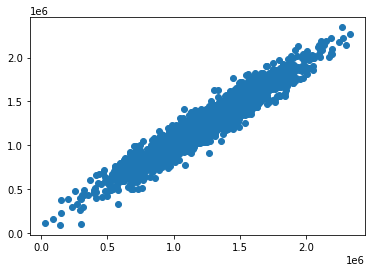

In [35]:
# Quick look at the predictions, if scattered points are close to a straight line
# the fitting is acceptable

plt.scatter(y_test, predictions)

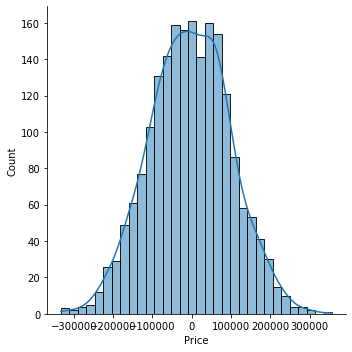

In [37]:
"""
This fit looks promising because the residuals are normaly distributed.
"""
sns.displot((y_test-predictions), kde=True)

In [42]:
import math
from sklearn import metrics

In [39]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914954

In [40]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209501

In [43]:
math.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291153

## Exercise using scikit datasets

In [47]:
from sklearn.datasets import fetch_california_housing

In [48]:
california = fetch_california_housing()

In [68]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [50]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [69]:
cali_df = pd.DataFrame(data=california['data'], columns=california['feature_names'])
cali_df['target'] = california['target'] * 100000

In [70]:
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


### Exploratory data analysis

In [71]:
cali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [72]:
cali_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000


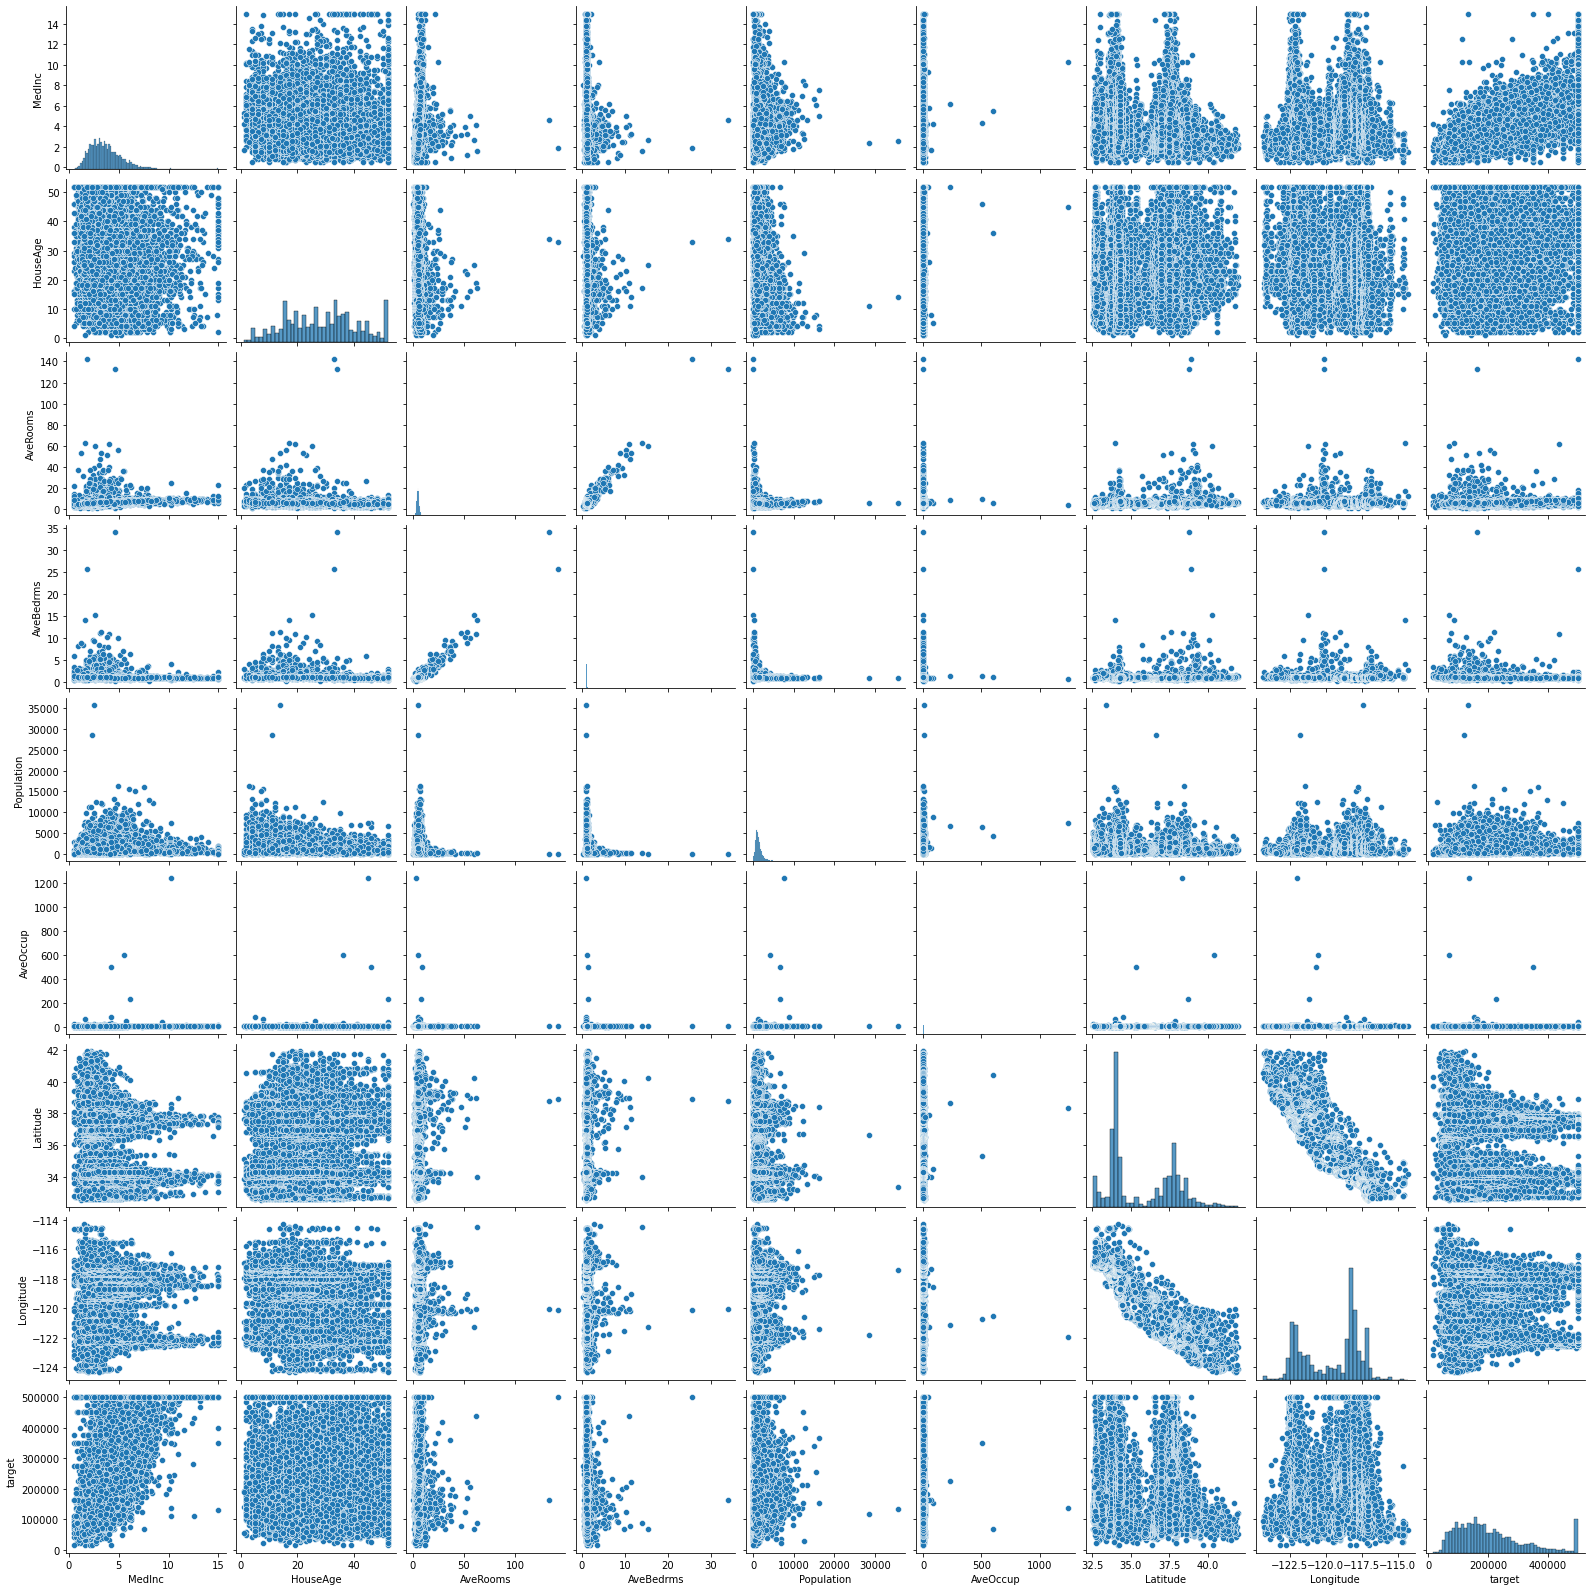

In [73]:
sns.pairplot(data=cali_df)

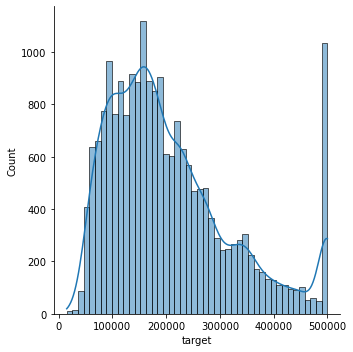

In [74]:
sns.displot(data=cali_df['target'], kde=True)

<AxesSubplot:>

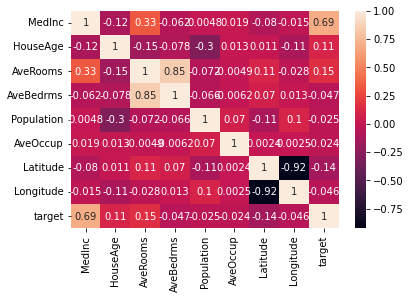

In [75]:
sns.heatmap(data=cali_df.corr(), annot=True)

In [76]:
cali_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [78]:
X = pd.DataFrame(data=california['data'], columns=california['feature_names'])
y = pd.DataFrame(data = cali_df['target']* 100000, columns=['target'])

,target
0,4.526000e+10
1,3.585000e+10
2,3.521000e+10
3,3.413000e+10
4,3.422000e+10
...,...
20635,7.810000e+09
20636,7.710000e+09
20637,9.230000e+09
20638,8.470000e+09


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [82]:
lm2 = LinearRegression()

In [83]:
lm2.fit(X_train,y_train)

LinearRegression()

In [84]:
print(lm2.intercept_)

[-3.77454929e+11]


In [86]:
lm2.coef_

array([[ 4.40968386e+09,  9.65153623e+07, -1.13171727e+09,
         7.58859034e+09, -2.45145943e+03, -3.41681059e+07,
        -4.27037457e+09, -4.41876394e+09]])

In [88]:
cali_predict = lm2.predict(X_test)

In [89]:
cali_predict

array([[2.05362395e+10],
       [2.47088214e+10],
       [8.63823153e+09],
       ...,
       [2.18930753e+10],
       [8.90972814e+09],
       [2.38878602e+10]])

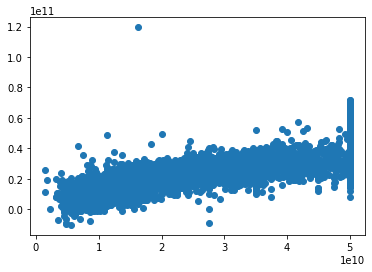

In [91]:
# Probably not the best fit, but it's fine for an exercise

plt.scatter(y_test, cali_predict)

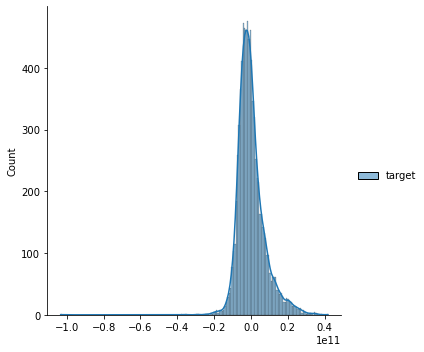

In [93]:
sns.displot(data=(y_test-cali_predict), kde=True)

In [94]:
metrics.mean_absolute_error(y_test, cali_predict)

5318744354.094152

In [95]:
metrics.mean_squared_error(y_test, cali_predict)

5.4354605988134674e+19

In [96]:
math.sqrt(metrics.mean_squared_error(y_test, cali_predict))

7372557628.67505